In [1]:
import os
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', 5000) #Show all columns

In [3]:
#ICGC_SAMPLE_ID = 'SA320818' #Sample we are reading
#df = pd.read_csv('E:/Sequencing/meth_seq.MALY-DE.tsv/samples/' + ICGC_SAMPLE_ID + '.tsv', \
#                 sep = '\t', low_memory=False, dtype={'chromosome': 'object'})

In [3]:
ICGC_SAMPLE_ID = 'SA557646' #Sample we are reading
df = pd.read_csv('E:/Sequencing/meth_seq.MALY-DE.tsv/samples/' + ICGC_SAMPLE_ID + '.tsv', \
                 sep = '\t', low_memory=False)
df.head()

,icgc_sample_id,chromosome,chromosome_start,chromosome_end,chromosome_strand,methylation_ratio,methylated_read_count,unmethylated_read_count
0,SA557646,16,1893033,1893033,1,0.94,30.0,2.0
1,SA557646,16,1893034,1893034,1,1.00,31.0,0.0
2,SA557646,16,1893061,1893061,1,0.97,28.0,1.0
3,SA557646,16,1893062,1893062,1,0.90,37.0,4.0
4,SA557646,16,1893077,1893077,1,0.96,26.0,1.0


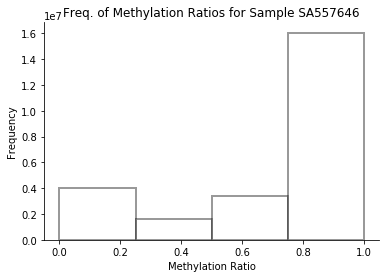

In [4]:
#Testing the charts
chart = sns.distplot(df['methylation_ratio'],\
                     kde = False, norm_hist = False, bins = 4,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Methylation Ratios for Sample {}".format(ICGC_SAMPLE_ID))
sns.despine()
plt.ylabel('Frequency')
plt.xlabel('Methylation Ratio')
plt.show(chart)

In [ ]:
plt.savefig('test.pdf', dpi=300)

# Data Analysis


In [2]:
sns.set()


### Creating individual histograms

In [ ]:
cols = ['methylation_ratio']
directory = 'E:/Sequencing/meth_seq.MALY-DE.tsv/samples'
for file in os.listdir(directory):
    if file.endswith(".tsv"):
        print("PROCESSING " + file) #Print file name
        df = pd.read_csv('E:/Sequencing/meth_seq.MALY-DE.tsv/samples/' + file, \
                 sep = '\t', low_memory=False, usecols = cols) #Read into pandas
        plt.clf() #Clear Figure
        chart = sns.distplot(df['methylation_ratio'],\
                     kde = False, norm_hist = False, bins = 5,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Methylation Ratios for Sample {}".format(ICGC_SAMPLE_ID))
        sns.despine()
        plt.ylabel('Frequency')
        plt.xlabel('Methylation Ratio') #Create histogram
        plt.savefig('{}.pdf'.format(os.path.splitext(file)[0]), dpi=300) #Save histogram to pdf

print("DONE")

### Creating histogram of all MALY samples

In [8]:
np_ = df['methylation_ratio'].to_numpy(dtype = np.float64)

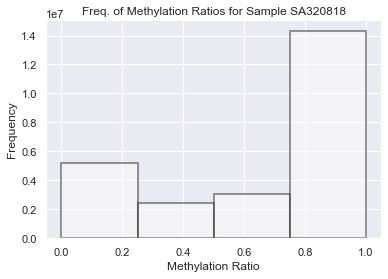

In [10]:
#Testing the charts
chart = sns.distplot(np_,\
                     kde = False, norm_hist = False, bins = 4,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Methylation Ratios for Sample {}".format(ICGC_SAMPLE_ID))
sns.despine()
plt.ylabel('Frequency')
plt.xlabel('Methylation Ratio')
plt.show(chart)

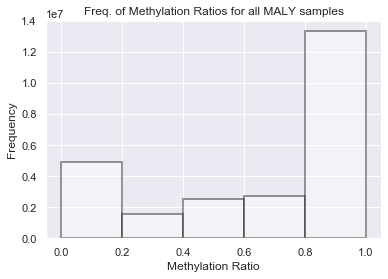

In [14]:
chart = sns.distplot(np_,\
                     kde = False, norm_hist = False, bins = 5,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Methylation Ratios for all MALY samples")
sns.despine()
plt.ylabel('Frequency')
plt.xlabel('Methylation Ratio') #Create histogram
plt.savefig('MALY.pdf', dpi=300) #Save histogram to pdf

In [13]:
print(np_[0:5])

[0.5  0.94 0.71 0.44 0.55]
